In [8]:
import pandas as pd
import seaborn as sns

In [9]:
avalanche_set = pd.read_csv('newData/gesamt_set_1.csv', sep=',')

<AxesSubplot:>

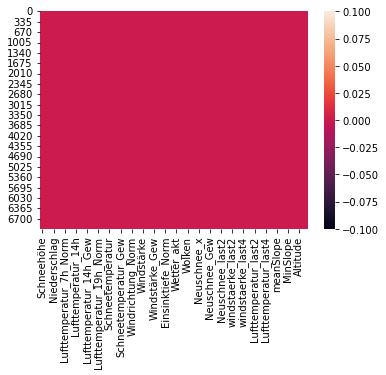

In [10]:
avalanche_set['ID'] = avalanche_set['ID'].fillna(0)
avalanche_set = avalanche_set.drop([ 'Datum','Intervall', 'ID'], axis=1)
avalanche_set = avalanche_set.dropna()


sns.heatmap(avalanche_set.isna())

In [11]:
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from sklearn_genetic import GAFeatureSelectionCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn_genetic.plots import plot_fitness_evolution

feature_names = avalanche_set.columns.drop('Avalanche')
X = avalanche_set[avalanche_set.columns.drop('Avalanche')]
y = avalanche_set['Avalanche']

#estimators = linear_model.LogisticRegression(solver="liblinear", multi_class="ovr")

clf = make_pipeline(StandardScaler(), svm.SVC())
evolved_estimator = GAFeatureSelectionCV(
    estimator=clf,
    cv=10,
    scoring="accuracy",
    population_size=60,
    generations=50,
    crossover_probability=0.2,
    mutation_probability=0.8,
    tournament_size=3,
    elitism=True,
    max_features=None,
    verbose=True,
    n_jobs=-1)

# Train and select the features
evolved_estimator.fit(X, y)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	60    	0.710234	0.0139465  	0.74248    	0.669695   
1  	120   	0.722208	0.00820327 	0.746184   	0.703878   
2  	120   	0.728876	0.00877302 	0.746469   	0.714991   
3  	120   	0.733216	0.00827306 	0.746469   	0.720126   
4  	120   	0.740377	0.0059954  	0.74775    	0.725243   
5  	120   	0.744212	0.00439489 	0.754158   	0.727524   
6  	120   	0.746531	0.00274959 	0.754158   	0.741341   
7  	120   	0.748321	0.002463   	0.754158   	0.742053   
8  	120   	0.750664	0.00224706 	0.754158   	0.743759   
9  	120   	0.75277 	0.00217129 	0.757863   	0.747039   
10 	120   	0.753273	0.00310109 	0.757863   	0.735499   
11 	120   	0.754292	0.00229451 	0.757863   	0.740768   
12 	120   	0.754964	0.00158027 	0.75715    	0.749457   
13 	120   	0.755873	0.0016665  	0.759428   	0.748603   
14 	120   	0.756367	0.00219873 	0.760714   	0.747751   
15 	120   	0.757794	0.00192477 	0.761139   	0.752594   
16 	120   	0.758443	0.00279824 	0.761139   	0.74

GAFeatureSelectionCV(cv=10,
                     estimator=Pipeline(steps=[('standardscaler',
                                                StandardScaler()),
                                               ('svc', SVC())]),
                     generations=50, n_jobs=-1, population_size=60,
                     return_train_score=True, scoring='accuracy')

In [12]:

selected_features = evolved_estimator.best_features_
for i in range(0, len(selected_features)):
    if selected_features[i] == True:
        print("\'" + feature_names[i] + "\',")

for i in range(0, len(selected_features)):
    if selected_features[i] == True:
        print(feature_names[i])

'Schneehöhe',
'Lufttemperatur_7h_Gew',
'Lufttemperatur_14h',
'Lufttemperatur_14h_Norm',
'Lufttemperatur_19h_Norm',
'Lufttemperatur_19h_Gew',
'Schneetemperatur',
'Schneetemperatur_Norm',
'Schneetemperatur_Gew',
'Windrichtung_Norm',
'Windstärke',
'Windstärke_Gew',
'Einsinktiefe_Gew',
'Wetter_gestern',
'Wolken',
'Neuschnee_Norm',
'Neuschnee_last4',
'windstaerke_last3',
'Lufttemperatur_last3',
'Lufttemperatur_last4',
'meanExpo',
'meanSlope',
'stdDevSlope',
'MinSlope',
'MaxSlope',
'Altitude',
Schneehöhe
Lufttemperatur_7h_Gew
Lufttemperatur_14h
Lufttemperatur_14h_Norm
Lufttemperatur_19h_Norm
Lufttemperatur_19h_Gew
Schneetemperatur
Schneetemperatur_Norm
Schneetemperatur_Gew
Windrichtung_Norm
Windstärke
Windstärke_Gew
Einsinktiefe_Gew
Wetter_gestern
Wolken
Neuschnee_Norm
Neuschnee_last4
windstaerke_last3
Lufttemperatur_last3
Lufttemperatur_last4
meanExpo
meanSlope
stdDevSlope
MinSlope
MaxSlope
Altitude


In [13]:
print(evolved_estimator.best_estimator_)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])


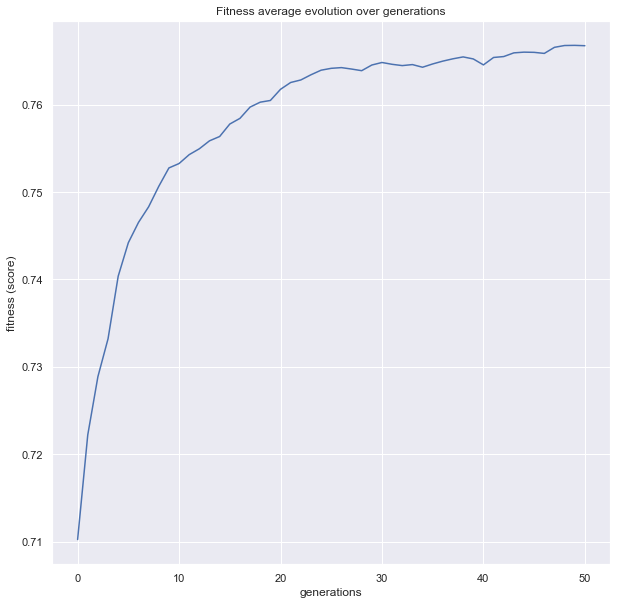

In [14]:
plot = plot_fitness_evolution(evolved_estimator, metric="fitness")
plt.show()